# Demo : Even/ODD classify

Author: Jim Xie

Date:   2020-08-07

In [1]:
# -*- coding: utf-8 -*- 
import sys,os,random,math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from numpy.random import RandomState
np.set_printoptions(suppress=True)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, BaggingClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from xgboost import XGBClassifier
sns.set(font_scale=2)
from warnings import filterwarnings
filterwarnings('ignore')
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
g_classifiers = [
    # 逻辑回归
    ('Logistic Regression', LogisticRegression()), 
    # K最近邻
    ('Nearest Neighbors', KNeighborsClassifier(3)),  
    # 线性的支持向量机
    ('Linear SVM', SVC(kernel='linear', C=0.025)),
    # 径向基函数的支持向量机
    ('RBF SVM', SVC(gamma=2, C=1)),
    # 基于拉普拉斯近似的高斯过程
    ('Gaussian Process', GaussianProcessClassifier(1.0 * RBF(1.0))),  
    # 决策树
    ('Decision Tree', DecisionTreeClassifier(max_depth=5)),  
    # 随机森林
    ('Random Forest', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),  
    # 通过迭代弱分类器而产生最终的强分类器的算法
    ('AdaBoost', AdaBoostClassifier()),  
    ('Extra Trees', ExtraTreesClassifier()),
    # 梯度提升树
    ('GradientBoosting', GradientBoostingClassifier()),  
    ('Bagging', BaggingClassifier()),
    # 朴素贝叶斯
    ('Naive Bayes', GaussianNB()),  
    # 二次判别分析
    ('QDA', QuadraticDiscriminantAnalysis()),  
    # 线性判别分析
    ('LDA', LinearDiscriminantAnalysis()),  
    # 多层感知机
    ('MLP', MLPClassifier(alpha=1)),
    # 极端梯度提升
    ('XGB', XGBClassifier()),
]

In [3]:
def GetParityData():
    dataset_size = 100
    x1 = np.random.random_integers(0,500,dataset_size)
    y = []
    x = []
    for t1 in x1:
        if (t1)%2 == 0:
            y.append([1])
            x.append([t1])
        else:
            x.append([t1])
            y.append([0])
    return np.array(x),np.array(y)

In [4]:
raw_x,raw_y = GetParityData()

# EDA

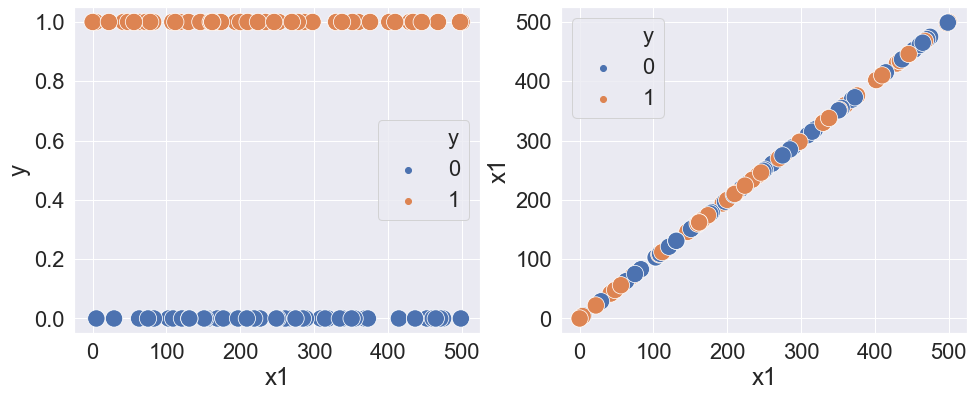

In [5]:
df = pd.DataFrame(raw_x)
df.rename(columns={0:'x1'},inplace=True) #df.columns.values.tolist()
df['y'] = raw_y
fig,axes=plt.subplots(1,2,figsize=(16,6)) 
ax = sns.scatterplot(x='x1', y='y',hue='y', data=df,s=300, ax=axes[0])
ax = sns.scatterplot(x='x1', y='x1',hue='y', data=df,s=300, ax=axes[1])
ax.ticklabel_format(style='plain',axis='both')

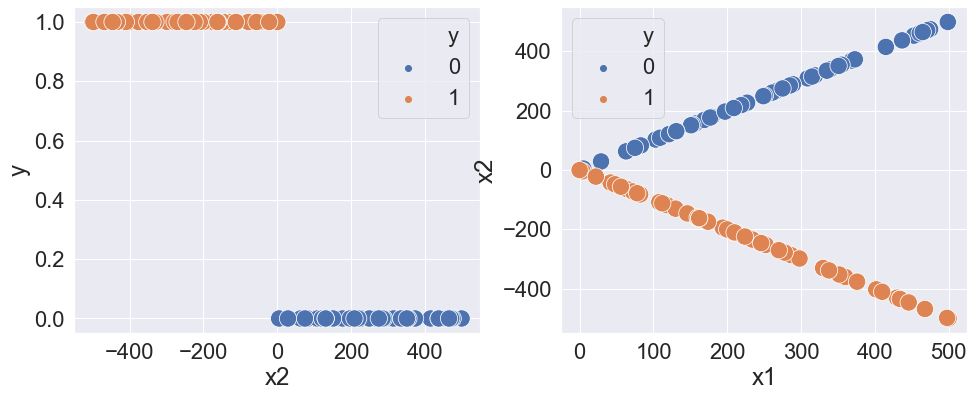

In [6]:
df['x2'] = df['x1']
df.x2[df.y==1] = -df['x1']
fig,axes=plt.subplots(1,2,figsize=(16,6))
ax = sns.scatterplot(x='x2', y='y',hue='y', data=df,s=300, ax=axes[0])
ax = sns.scatterplot(x='x1', y='x2',hue='y', data=df,s=300, ax=axes[1])
ax.ticklabel_format(style='plain',axis='both')

# Data Preprecess

In [7]:
def prepress(data):
    return np.power(-1.005,data)

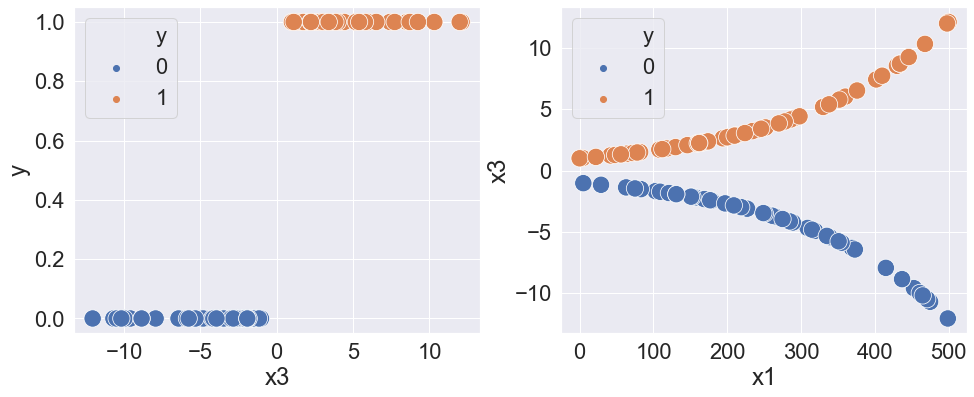

In [8]:
df['x3'] = prepress(df['x1'])
fig,axes=plt.subplots(1,2,figsize=(16,6)) 
ax = sns.scatterplot(x='x3', y='y',hue='y', data=df,s=300, ax=axes[0])
ax = sns.scatterplot(x='x1', y='x3',hue='y', data=df,s=300, ax=axes[1])
ax.ticklabel_format(style='plain',axis='both')

# Train

(100, 1) (100, 1)


<AxesSubplot:xlabel='1', ylabel='0'>

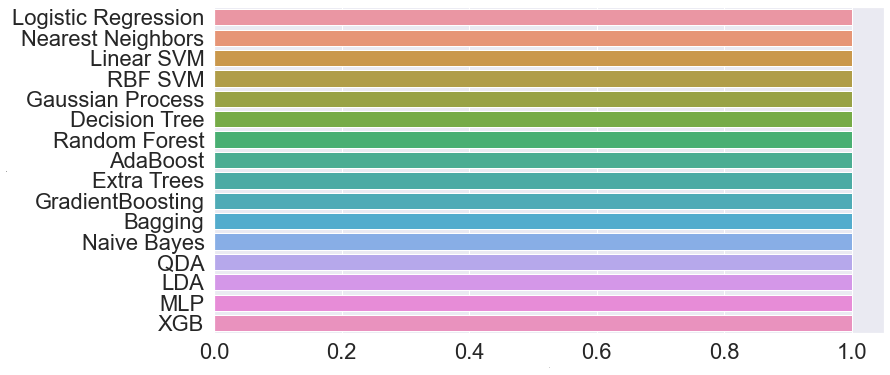

In [9]:
train_x,train_y = GetParityData()
test_x,test_y = GetParityData()
train_x = prepress(train_x)
test_x = prepress(test_x)
print(train_x.shape,train_y.shape)
result = []
models = {}
for name, clf in g_classifiers:
    clf.fit(train_x, train_y)
    score = clf.score(test_x, test_y)
    result.append((name,score))
    models[name] = clf
df = pd.DataFrame(result)
plt.style.use({'figure.figsize':(12, 6)})
plt.xlabel('Classifier',fontsize=2)
plt.ylabel('Accuracy',fontsize=2)
sns.barplot(y=0, x=1, data=df)

# Predict

In [10]:
input_x = np.random.random_integers(500,1000,20)
input_x=input_x[:,np.newaxis]
pred_x = np.array(input_x)
pred_x = prepress(pred_x)
pred_y = models['XGB'].predict(pred_x)
for x,y in zip(input_x,pred_y):
    if y == 1:
        print(" %d --> Even" %x[0])
    else:
        print(" %d --> Odd" %x[0])

 990 --> Even
 577 --> Odd
 654 --> Even
 644 --> Even
 778 --> Even
 886 --> Even
 901 --> Odd
 847 --> Odd
 772 --> Even
 773 --> Odd
 663 --> Odd
 621 --> Odd
 611 --> Odd
 706 --> Even
 890 --> Even
 983 --> Odd
 643 --> Odd
 562 --> Even
 689 --> Odd
 634 --> Even


In [11]:
raw_x,raw_y = GetParityData()
raw_x = prepress(raw_x)
test_x,test_y = GetParityData()
test_ori_x = test_x
test_x = prepress(test_x)

In [12]:
input_x = tf.placeholder(tf.float32, [None, 1])
input_y = tf.placeholder(tf.float32, [None, 1])

In [13]:
def Create_Input(n_hidden_count):
    dim = input_x.shape[1].value
    w = tf.Variable(tf.random_normal([dim,n_hidden_count],stddev=1,seed=1))
    b = tf.Variable(tf.random_normal([n_hidden_count],stddev=1,seed=1))
    o = tf.matmul(input_x, w)+b
    o = tf.nn.sigmoid(o)
    return o
def Create_Hidden(in_data,n_hidden_count):
    dim = in_data.shape[1].value
    w = tf.Variable( tf.truncated_normal([dim, n_hidden_count]), name = 'w')
    b = tf.Variable(tf.random_normal([n_hidden_count],stddev=1,seed=1))
    o = tf.matmul(in_data, w)+b
    o = tf.nn.sigmoid(o)
    return o
def Create_Output(in_data):
    dim = in_data.shape[1].value
    out_dim = input_y.shape[1].value
    w = tf.Variable( tf.truncated_normal([dim, out_dim]), name = 'w')
    b = tf.Variable(tf.random_normal([out_dim],stddev=1,seed=1))
    o = tf.matmul(in_data, w)+b
    o = tf.nn.sigmoid(o)
    return o

In [14]:
L0 = Create_Input(1)
L1 = Create_Hidden(L0,1)
prediction = Create_Output(L1)

In [15]:
entropy = input_y * tf.log(tf.clip_by_value(prediction,1e-10,1.0))+(1-input_y) * tf.log(tf.clip_by_value(1-prediction,1e-10,1.0))
cross_entropy = -tf.reduce_mean(entropy)
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(10000):
    sess.run(train_step,feed_dict={input_x:raw_x,input_y:raw_y})
    if i % 500 == 0:
        total_cross_entropy = sess.run(cross_entropy,feed_dict={input_x:raw_x,input_y:raw_y})
        print("Step %d, loss is %6f"%(i,total_cross_entropy))
pred_Y = sess.run(prediction,feed_dict={input_x:test_x})

Step 0, loss is 0.834545
Step 500, loss is 0.140264
Step 1000, loss is 0.037824
Step 1500, loss is 0.018159
Step 2000, loss is 0.010595
Step 2500, loss is 0.006819
Step 3000, loss is 0.004650
Step 3500, loss is 0.003292
Step 4000, loss is 0.002391
Step 4500, loss is 0.001769
Step 5000, loss is 0.001325
Step 5500, loss is 0.001003
Step 6000, loss is 0.000764
Step 6500, loss is 0.000586
Step 7000, loss is 0.000451
Step 7500, loss is 0.000348
Step 8000, loss is 0.000269
Step 8500, loss is 0.000209
Step 9000, loss is 0.000162
Step 9500, loss is 0.000126


In [16]:
for x,y,label in zip (test_ori_x,pred_Y,test_y):
    if y > 0.5: 
       print(x[0], "--- Even")
    else:
       print(x[0], "--- Odd")

164 --- Even
55 --- Odd
329 --- Odd
240 --- Even
381 --- Odd
159 --- Odd
269 --- Odd
225 --- Odd
352 --- Even
67 --- Odd
271 --- Odd
33 --- Odd
232 --- Even
287 --- Odd
455 --- Odd
376 --- Even
277 --- Odd
320 --- Even
433 --- Odd
125 --- Odd
312 --- Even
365 --- Odd
452 --- Even
13 --- Odd
407 --- Odd
76 --- Even
338 --- Even
135 --- Odd
91 --- Odd
176 --- Even
483 --- Odd
376 --- Even
411 --- Odd
242 --- Even
242 --- Even
26 --- Even
273 --- Odd
285 --- Odd
375 --- Odd
493 --- Odd
88 --- Even
38 --- Even
293 --- Odd
133 --- Odd
270 --- Even
174 --- Even
355 --- Odd
10 --- Even
83 --- Odd
102 --- Even
466 --- Even
39 --- Odd
8 --- Even
336 --- Even
298 --- Even
285 --- Odd
391 --- Odd
286 --- Even
291 --- Odd
433 --- Odd
426 --- Even
310 --- Even
162 --- Even
234 --- Even
264 --- Even
324 --- Even
449 --- Odd
476 --- Even
401 --- Odd
112 --- Even
1 --- Odd
122 --- Even
23 --- Odd
180 --- Even
387 --- Odd
277 --- Odd
21 --- Odd
46 --- Even
445 --- Odd
210 --- Even
319 --- Odd
237 --- O

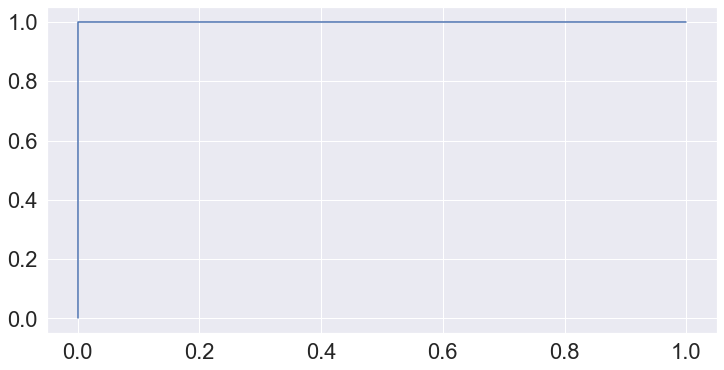

[1.999922   0.99992204 0.999922   0.9999219  0.99992186 0.9999218
 0.9999217  0.99992156 0.9999214  0.9999213  0.00011984 0.00011966
 0.00011958 0.00011944 0.00011941 0.00011927 0.0001192  0.00011905
 0.00011898 0.0001189  0.00011888 0.00011881 0.00011881 0.00011881
 0.00011881 0.0001188  0.00011879 0.00011879 0.00011879 0.00011879
 0.00011879]


In [17]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_Y, pos_label=1,drop_intermediate=False)
plt.plot(fpr,tpr)
plt.show()
print(thresholds)